In [ ]:
## This Python notebook implements the linear regression from scratch for univariate (single feature)
## using gradient descent method
## Credit : Machine Learning course (assignment #1) from Prof Andrew Ng (free course on Coursera/Stanford)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
# load data from csv file 
data=np.genfromtxt('ex1data1.txt', delimiter=',')
# first column : single feature (population in city)
X=data[:,0:1]

# second column : profit (target figure)
y=data[:,1:2]

# count of examples (number of cities)
m=len(y)

## needed for np.polyfit function (as reference to check the acurracy of result)
x=X.reshape(m)

## for debug
print(X.shape)

(97, 1)


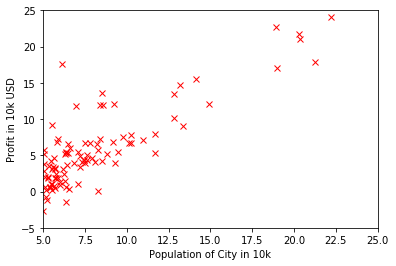

In [30]:
## plot the datapoints / training data
plt.plot(X, y, 'rx')
plt.axis([5, 25, -5, 25])
plt.ylabel('Profit in 10k USD')
plt.xlabel('Population of City in 10k')
plt.show()

[1.19303364]
[-3.89578088]


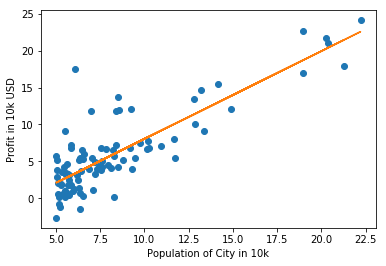

In [31]:
## plot the fitting curve to find the slope and intercept as reference of the research
# using the standard np.polyfit Numpy function
a, b = np.polyfit(x, y, 1)
plt.ylabel('Profit in 10k USD')
plt.xlabel('Population of City in 10k')
plt.plot(x, y, 'o')
plt.plot(x, a*x + b)
## expected slope : a
print(a)
## expected intercept : b
print(b)

In [32]:
ones = np.ones(m).reshape(m,1)
print(ones.shape)
# Prepare first 'feature' which is always 1

(97, 1)


In [33]:
X_train = (np.append(ones, X, axis=1))
# Append the first columns of 1 in X matrix (artificial feature for the intercept)
X_train.shape

(97, 2)

In [6]:
theta = np.zeros(2).reshape(2,1)
# initialise the parameters (two for univariate linear regression) a*x + b = y
# theta[0] is b : intercept
# theta[1] is a : slope

In [7]:
# Some gradient descent settings
iterations = 1500;
alpha = 0.01;

In [8]:
def computeCost(X_train,y,theta):
  #COMPUTECOST Compute cost for linear regression
  #   J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
  #   parameter for linear regression to fit the data points in X and y

  # Initialize some useful values
  m = len(y)
  # You need to return the following variables correctly 
  J = 0;
  # ====================== YOUR CODE HERE ======================
  # Instructions: Compute the cost of a particular choice of theta
  #               You should set J to the cost.

  #In math : predictions =  X_train * theta
  predictions =  np.matmul(X_train,theta)
  square_err = np.power((predictions - y),2)
  J = 1/(2*m)* np.sum(square_err)
  # least square method : square the difference to take the absolute value
  return J

# =========================================================================

J_history = np.zeros(1500).reshape(1500,1)
# for debug
print(theta)

[[0.]
 [0.]]


In [9]:
def gradientDescent(X_train, y, theta, alpha, num_iters,J_history):
#GRADIENTDESCENT Performs gradient descent to learn theta
#   theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) updates theta by 
#   taking num_iters gradient steps with learning rate alpha

# Initialize some useful values
  m = len(y) 
# number of training examples

  for iter in range(num_iters):
    # ====================== YOUR CODE HERE ======================
    # Instructions: Perform a single gradient step on the parameter vector
    #               theta. 
    #
    # Hint: While debugging, it can be useful to print out the values
    #       of the cost function (computeCost) and gradient here.
    #
    predictions =  np.matmul(X_train,  theta)
    ## using partial derivative
    t0 = np.sum(predictions - y)
    t1 = np.sum(np.matmul(np.transpose(X) , (predictions - y)))
    theta[0] = theta[0] - alpha * (1/m) * t0
    theta[1] = theta[1] - alpha * (1/m) * t1
    # ============================================================
    # Save the cost J in every iteration    
    #J_history(iter) = computeCost(X, y, theta);
  return (theta)


In [10]:
J=computeCost(X_train, y, theta)

In [11]:
print(J)
print(theta)
## cost with the null parameters (defauted null values in initialisation of theta variable)

32.072733877455676
[[0.]
 [0.]]


In [12]:
theta = gradientDescent(X_train, y, theta, alpha, iterations,J_history)

In [13]:
print(theta)
# the values match with polyfit (moreless)

[[-3.63029144]
 [ 1.16636235]]


In [14]:
JJ=computeCost(X_train, y, theta)
print("Least cost:"+repr(JJ))
# check the least cost - debug

Least cost:4.483388256587725


In [15]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.matmul([1, 3.5], theta)
print('For population = 35,000, we predict a profit of ' + repr(predict1[0]*10000))
predict2 = np.matmul([1, 7], theta)
print('For population = 70,000, we predict a profit of ' + repr(predict2[0]*10000))
# remember the currency amounts are in kilo (thousands)

For population = 35,000, we predict a profit of 4519.7678677017675
For population = 70,000, we predict a profit of 45342.45012944714


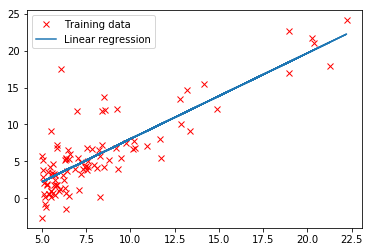

In [16]:
# Plot the linear fitting line using the gradient descent results

plt.plot(X, y, 'rx',label = 'Training data')
predictions =  np.matmul(X_train,  theta)
plt.plot( X,predictions, '-',label = 'Linear regression')
plt.legend()

In [17]:
# ============= Part 4: Visualizing J(theta_0, theta_1) =============


# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros(len(theta0_vals) * len(theta1_vals))
J_vals = J_vals.reshape(len(theta0_vals) , len(theta1_vals))
# Fill out J_vals
cst = 32
t_min=theta
for i in range(len(theta0_vals)):
  for j in range(len(theta1_vals)):
    t = np.array([theta0_vals[i], theta1_vals[j]])
    t=t.reshape(2,1)
    J_vals[i,j] = computeCost(X_train, y, t)
    
    # for debug
    if (J_vals[i,j] < cst):
        cst = J_vals[i,j] 
        t_min[0]=theta0_vals[i]
        t_min[1]=theta1_vals[j]
print (cst)
# debug check the least cost that matches

4.480459391893313


In [18]:
print(t_min)
## for debug

[[-3.73737374]
 [ 1.17171717]]


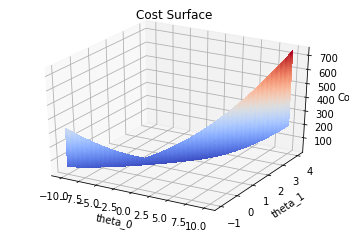

<Figure size 432x288 with 0 Axes>

In [20]:
# Plot the surface : the Cost function of theta
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker, cm 
ax = plt.axes(projection='3d')
fig = plt.figure()
#ax.plot_surface(theta0_vals,theta1_vals,J_vals)
# Plot the surface.
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('Cost')
ax.set_title('Cost Surface');
plt.show()

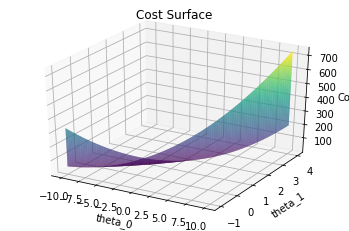

<Figure size 432x288 with 0 Axes>

In [21]:
# Plot the surface : the Cost function of theta - second version 
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
fig = plt.figure()
#ax.plot_surface(theta0_vals,theta1_vals,J_vals)
# Plot the surface.

surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals, rstride=1, cstride=1,
               cmap='viridis')



ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('Cost')
ax.set_title('Cost Surface')
plt.show()

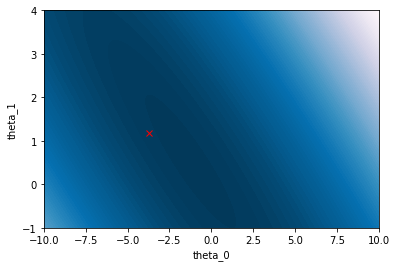

In [22]:
# Contour plot
from matplotlib import ticker, cm 
fig=plt.figure()
ax2d=fig.add_subplot(111)
T0, T1 = np.meshgrid(theta0_vals, theta1_vals) 
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
# logspace(-2, 3, 20)
# PuBu_r RdGy
cs=ax2d.contourf(theta0_vals, theta1_vals, J_vals,100, cmap='PuBu_r')
#cs=ax2d.contourf(T0,T1, J_vals,100,cmap='RdGy' )
# locator=ticker.LogLocator(), cmap=cm.PuBu_r
ax2d.set_xlabel('theta_0')
ax2d.set_ylabel('theta_1')


ax2d.plot(theta[0], theta[1], 'rx')


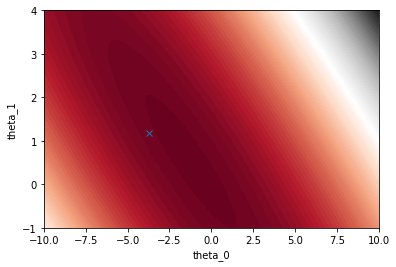

In [23]:
# Contour plot - second version
from matplotlib import ticker, cm 
fig=plt.figure()
ax2d=fig.add_subplot(111)
T0, T1 = np.meshgrid(theta0_vals, theta1_vals) 
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
# logspace(-2, 3, 20)
# PuBu_r RdGy
#cs=ax2d.contourf(theta0_vals, theta1_vals, J_vals,100, cmap='RdGy')
cs=ax2d.contourf(T0,T1, J_vals,100,cmap='RdGy' )
# locator=ticker.LogLocator(), cmap=cm.PuBu_r
ax2d.set_xlabel('theta_0')
ax2d.set_ylabel('theta_1')


ax2d.plot(theta[0], theta[1], 'x')